# A Quick Machine Learning Modelling Tutorial with Python and Scikit-Learn (sklearn)


## TODO - What is Scikit-Learn (sklearn)?

[NumPy](https://docs.scipy.org/doc/numpy/index.html) stands for numerical Python. It's the backbone of all kinds of scientific and numerical computing in Python.

And since machine learning is all about turning data into numbers and then figuring out the patterns, NumPy often comes into play.

<img src="images/6-step-ml-framework-tools-numpy-highlight.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## TODO - Why Scikit-Learn?

You can do numerical calculations using pure Python. In the beginning, you might think Python is fast but once your data gets large, you'll start to notice slow downs.

One of the main reasons you use NumPy is because it's fast. Behind the scenes, the code has been optimized to run using C. Which is another programming language, which can do things much faster than Python.

The benefit of this being behind the scenes is you don't need to know any C to take advantage of it. You can write your numerical computations in Python using NumPy and get the added speed benefits.

If your curious as to what causes this speed benefit, it's a process called vectorization. [Vectorization](https://en.wikipedia.org/wiki/Vectorization) aims to do calculations by avoiding loops as loops can create potential bottlenecks.

NumPy achieves vectorization through a process called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#module-numpy.doc.broadcasting).


## TODO - What does this notebook cover?

The NumPy library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses on the main concepts of NumPy and the `ndarray` datatype.

You can think of the `ndarray` datatype as a very flexible array of numbers.

More specifically, we'll look at:
* NumPy datatypes & attributes
* Creating arrays
* Viewing arrays & matrices (indexing)
* Manipulating & comparing arrays
* Sorting arrays
* Use cases (examples of turning things into numbers)

After going through it, you'll have the base knolwedge of NumPy you need to keep moving forward.

## TODO - Where can I get help?
If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since NumPy is very friendly, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem. You'll likely end up in 1 of 2 places:
    * [NumPy documentation](https://docs.scipy.org/doc/numpy/index.html) - the ground truth for everything NumPy, this resource covers all of the NumPy functionality.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    
An example of searching for a NumPy function might be:

> "how to find unique elements in a numpy array"

Searching this on Google leads to the NumPy documentation for the `np.uniquie()` function: https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

The next steps here are to read through the documentation, check the examples and see if they line up to the problem you're trying to solve. If they do, **rewrite the code** to suit your needs, run it, and see what the outcomes are.

3. **Ask for help** - If you've been through the above 2 steps and you're still stuck, you might want to ask your question on [Stack Overflow](https://www.stackoverflow.com). Be as specific as possible and provide details on what you've tried.

Remember, you don't have to learn all of the functions off by heart to begin with. 

What's most important is continually asking yourself, "what am I trying to do with the data?".

Start by answering that question and then practicing finding the code which does it.

Let's get started.

## Topics to cover

* Focus on a few topics which a student can use to get started
* Concepts should be covered which are covered in the heart disease project
* An Scikit-Learn/sklearn workflow is paramount, start with that and work backwards 

Concepts to go over before the code:
* Getting data ready (splitting into train and test sets)
* Choosing the algorithm (called estimator, model... etc)
* Choosing the hyperparameters (knobs you can turn on your model)
* Fitting the model to the data (easy to do if your data is ready)
* Evaluating the model (different problems have different metrics)
* Use the model to make predictions on the future (unseen data)
* Experimentation
    * Trying different models
    * Trying different hyperparameters
    * Getting more data

* Things to watch out for:
    * High-bias models: underfits the data
    * High-variance models: overfits the data
    * A model will never, except by chance, give a better score to the validation set than the training set
    

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 0. An end-to-end Scikit-Learn workflow

Show a student what it looks like going through the heart disease dataset and building a machine learning model to classify whether a patient has heart disease and then use the model to predict whether a new patient has heart disease or not (could use my own data for this).

Take the heart disease dataset, split it, fit a model, check out the model, introduce these with the steps:

1. Get data ready (`train_test_split()`, `X`, `y`)
2. Choose a model (Scikit-Learn estimator cheatsheet - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) 
3. Choose the hyperparameters (different for each model)
4. Fit the model
5. Evaluate the model
6. Use the model to make a prediction
    * Step 5 & 6 are similar because to evaluate the model we'll be making predictions with it 
7. Experiment to improve 
8. Save model for use elsewhere

Once students have seen an end-to-end workflow, work backwards through each step.

Put all of these steps into a pipeline.

### Random Forest Classifier Workflow for Classifying Heart Disease

#### 1. Get the data ready

We'll import the `heart-disease.csv` file we've been working with to create a scikit-learn workflow.

In [2]:
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')

# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64, 1    165
 0    138
 Name: target, dtype: int64)

In [33]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

#### 2. Choose the model
This is often referred to as `model` or `clf` (short for classifier) or estimator (as in the Scikit-Learn) documentation.

In [34]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#### 3. Choose the hyperparameters
Hyperparameters are like knobs on an oven you can tune to cook your favourite dish.

In [35]:
# We'll leave as default to begin with...
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 4. Fit the model to the data
Fitting the model on the data involves passing it the data and asking it to figure out the patterns. 

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels. 

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [36]:
model.fit(X_train, y_train)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 5. Evaluate the model

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [37]:
# Evaluate the model on the training set
model.score(X_train, y_train)

0.9779735682819384

In [38]:
# Evaluate the model on the test set
model.score(X_test, y_test)

0.8157894736842105

#### 6. Use the model to make a prediction

The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

Once our model instance is trained, you can use the `predict()` method to predict a target value given a set of features. In other words, use the model, along with some unlabelled data to predict the label. 

Note, data you predict on has to be in the same shape as data you trained on.

In [39]:
# This doesn't work... incorrect shapes
y_label = model.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3


In [41]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = model.predict(X_test)

Now we've made some predictions, we can start to use some more scikit-learn methods to figure out how good our model is. 

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.86      0.82      0.84        44

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76



In [43]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[26,  6],
       [ 8, 36]])

In [44]:
accuracy_score(y_test, y_preds)

0.8157894736842105

#### 7. Experiment to improve

The first model you build is often referred to as a baseline.

Once you've got a baseline model, like we have here, it's important to remember, this is often not the final model you'll use.

The next step in the workflow is to try and improve upon your baseline model.

And to do this, there's two ways to look at it. From a model perspective and from a data perspective.

From a model perspective this may involve things such as using a more complex model or tuning your models hyperparameters.

From a data perspective, this may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to data perspective experiments if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your reuslts should always be cross-validated. Cross-validation is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created. 

* Try different hyperparameters
* All different parameters should be cross-validated 
    * **Note:** Beware of cross-validation for time series problems 
    
Different models you use will have different hyperparameters you can tune. For the case of our model, the `RandomForestClassifier()`, we'll start trying different values for `n_estimators`.

In [45]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 20 estimators...
Model accuracy on test set: 82.89473684210526%

Trying model with 30 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 40 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 50 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 60 estimators...
Model accuracy on test set: 81.57894736842105%

Trying model with 70 estimators...
Model accuracy on test set: 84.21052631578947%

Trying model with 80 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 90 estimators...
Model accuracy on test set: 81.57894736842105%



In [46]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.94736842105263%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 80.26315789473685%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 85.52631578947368%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 80.26315789473685%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 78.94736842105263%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 81.57894736842105%
Cross-validation score: 82.8142076502

In [47]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 80}

In [48]:
# Set the model to be the best estimator
model = grid.best_estimator_
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# Fit the best model
model = model.fit(X_train, y_train)

In [50]:
# Find the best model scores
model.score(X_test, y_test)

0.8026315789473685

#### 8. Save a model for someone else to use

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can save a scikit-learn model using Python's in-built `pickle` module.

In [20]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [21]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7631578947368421

## 2. Getting the data ready

* Splitting data into X and y (features and targets)
* `train_test_split()`
* Splitting time series data (beware of validation sets)

Two things to remember:
    * Making sure it's all numerical
        * How to encode something? (`one_hot...`)
        * Turn car_sales into a larger dataset with missing and categorical values
    * Making sure there are no missing values

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
# Splitting the data into X & y
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) # you can change the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
# 80% of data is being used for the test set 
X.shape[0] * 0.8

242.4

### Make sure it's all numerical
* One-hot encoding categories (or another method of encoding) - https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

We want to turn the `"Make"` and `"Colour"` columns into numbers.


In [63]:
# Import car-sales-extended.csv
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [64]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [65]:
# Split into X & y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now let's try and build a model on our `car_sales` data.

In [66]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Honda'

Oops... this doesn't work, we'll have to convert it to numbers first.

In [76]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [77]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.5431e+04])

In [81]:
X.iloc[0]

Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

In [69]:
# Another way... using pandas and pd.get_dummies()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [86]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [18]:
# The categorical categories are now either 1 or 0...
X["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [19]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
model.score(X_test, y_test)

0.28838980751757537

### What if there were missing values?

* Make sure there are no missing values
* Filling the variables up with the mean (there are other ways to do this and it's a hard challenge, filling data where there isn't any?)

In [143]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [144]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [146]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

ValueError: Input contains NaN

Ahh... this doesn't work. We'll have to either fill or remove the missing values.

Let's see what values are missing again.

In [147]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Fill missing data with pandas

What we'll do is fill the rows where categorical values are missing with `"missing"`, the numerical features with the mean or 4 for the doors. And drop the rows where the Price is missing. 

We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

**Note:** The practice of filling missing data is called **imputation**. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching for "data imputation techniques".

In [148]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

In [149]:
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [150]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [151]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [152]:
# Check our dataframe
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [153]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [154]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

We've removed the rows with missing Price values, now there's less data but there's no more missing values.

In [155]:
len(car_sales_missing)

950

In [156]:
# Now let's one-hot encode the categorical columns (copied from above)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [157]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.5431e+04,
       1.5323e+04])

### Fill missing data with Scikit-Learn

Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, scikit-learn provides another method called [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given strategy.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [158]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

Let's reimport it so it has missing values and we can fill them with Scikit-Learn.

In [159]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [160]:
# Drop the rows with missing in the "Price" column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [161]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [162]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [163]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [164]:
# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

In [165]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [166]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [167]:
# Get our transformed array back into a DataFrame
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [168]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [169]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [174]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.17283858824953835

If this looks confusing, don't worry, we've covered a lot of ground very quickly. And we'll revisit these strategies in a future section in way which makes a lot more sense.

For now, the key takeaways to remember are:
* Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
* For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as **feature engineering** or **feature encoding**.
* Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as **data imputation**.

## 3. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see `clf` (short for classifier) used as a classification instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

<img src="../images/sklearn-ml-map.png" />

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem. We'll use the Boston housing dataset built into Scikit-Learn's `datasets` module.

In [54]:
# Import the Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston # imports as dictionary

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Since it's in a dictionary, let's turn it into a DataFrame so we can inspect it better.

In [58]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
# How many samples?
len(boston_df)

506

Beautiful, our goal here is to use the feature columns, such as `CRIM`, which is the per capita crime rate by town, `AGE`, the proportion of owner-occupied units built prior to 1940 and more to predict the `target` column. Where the `target` column is the median house prices.

In essence, each row is a different town (data) in Boston and we're trying to build a model to predict the median house price (label) of a town given a series of attributes about the town.

Since we have data and labels, this is a supervised learning problem. And since we're trying to predict a number, it's a regression problem.

Knowing these two things, how do they line up on the Scikit-Learn machine learning algorithm cheat-sheet?

<img src="../images/sklearn-ml-map-cheatsheet-boston-housing-ridge.png" />

Following the map through, knowing what we know, it suggests we try [`RidgeRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Let's chek it out.

In [68]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.6662221670168522

What if `RidgeRegression` didn't work?

<img src="../images/sklearn-ml-map-cheatsheet-boston-housing-ensemble.png" />

Following the diagram, the next step would be to try [`EnsembleRegressors`](https://scikit-learn.org/stable/modules/ensemble.html). Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest). Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen is a great read.

Since we're working with regression, we'll use Scikit-Learn's [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

We can use the exact same workflow as above. Except for changing the model.

In [69]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8477414419760558

Woah, we get a boost in score on the test set of almost 0.2 with a change of model.

At first, the diagram can seem confusing. But once you get a little practice applying different models to different problems, you'll start to pick up which sorts of algorithms do better with different types of data.

### Picking an algorithm for a classification problem
Now, let's check out the choosing process for a classification problem.

Say you were trying to predict whether or not a patient had heart disease based on their medical records.

The dataset in `../data/heart-disease.csv` contains data for just that problem.

In [72]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
# How many samples are there?
len(heart_disease)

303

Similar to the Boston housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

So what do we know?

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Let's see how it lines up with our [Scikit-Learn algorithm cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<img src="../images/sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png"/>

Following the cheat-sheet we end up at [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) which stands for Linear Support Vector Classifier. Let's try it on our data. 

In [86]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

Straight out of the box (with no tuning or improvements) the model scores 47% accuracy, which with 2 classes (heart disease or not) is as good as guessing.

With this result, we'll go back to our diagram and see what our options are.

<img src="../images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png"/>

Following the path (and skipping a few, don't worry, we'll get to this) we come up to [`EnsembleMethods`](https://scikit-learn.org/stable/modules/ensemble.html) again. Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from above? We'll it has a dance partner, [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) which is an ensemble based machine model learning model for classification. You might be able to guess what we can use it for.

Let's try.

In [84]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

Using the `RandomForestClassifier` we get almost double the score of `LinearSVC`.

One thing to remember, is both models are yet to receive any hyperparameter tuning. Hyperparameter tuning is fancy term for adjusting some settings on a model to try and make it better. It usually happens once you've found a decent baseline result you'd like to improve upon.

In this case, we'd probably take the `RandomForestClassifier` and try and improve it with hyperparameter tuning (which we'll see later on).

### What about the other models?

Looking at the cheat-sheet and the examples above, you may have noticed we've skipped a few.

Why?

The first reason is time. Covering every single one would take a fair bit longer than what we've done here. And the second one is the effectiveness of ensemble methods.

A little tidbit for modelling in machine learning is:
* If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:
* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### Experiment until something works

The beautiful thing is, the way the Scikit-Learn API is designed, once you know the way with one model, using another is much the same.

And since a big part of being a machine learning engineer or data scientist is experimenting, you might want to try out some of the other models on the cheat-sheet and see how you go.

## 4. Fit the model to data

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

In Scikit-Learn, the process of having a machine learning model learn things from a dataset involves calling the `fit()` method and passing it data, such as, `fit(X, y)`.

Where `X` is a feature array and `y` is a target array.

Other names for `X` include:
* Data
* Feature variables
* Features

Other names for `y` include:
* Labels
* Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y`.

Let's revisit the example of using patient data (`X`) to predict whether or not they have heart disease (`y`).

In [87]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
model = RandomForestClassifier()

# Call the fit method on the model and pass it training data
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

What's happening here?

Calling the `fit()` method will cause the machine learning algorithm to attempt to find patterns between `X` and `y`. Or if there's no `y`, it'll be only within `X`.

Let's see `X`.

In [91]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


And `y`.

In [92]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Passing `X` and `y` to to the model will cause it to go through all of the examples in `X` (data) and see what their corresponding `y` (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook. 

For now, you could imagine it similar to how you would figure out patterns if you had enough time. 

You'd look at the feature variables, `X`, the `age`, `sex`, `chol` (cholesterol) and see what different values led to the labels, `y`, `1` for heart disease, `0` for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training:**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing (or in production):**

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

## TODO - 5. Evaluate the model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

### 1. General model evaluation with `score()`

If we bring down the code from our previous classification problem. To predict whether or not someone has heart disease based on their medical records.

We can see the `score()` method come into play.

**Note:** For this example, `model` has been changed to `clf`, short for classifier.

In [102]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Once the model has been fit on the training data (`X_train`, `y_train`), we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before (`X_test`, `y_test`).

In [103]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method.

You can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those predictions to the actual labels `y_test`.

A model which predicts everything 100% correct would receive a score of 1.0 (or 100%).

Our model doesn't get everything correct, but at 85% (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above.

In [100]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Due to the consistent design of the Scikit-Learn library, we can call the same `score()` method on `model`.

In [101]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8477414419760558

Here, `model` is an instance of `RandomForestRegressor`. And since it's a regression model, the default metric built into `score()` is the coefficient of determination or R^2 (pronounced R-sqaured).

Remeber, you can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the `score()` method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

### 2. Evaluating your models using the `scoring` parameter 

The next step up from using `score()` is to use a custom `scoring` parameter with `cross_val_score()` or `GridSearchCV`.

As you may have guessed, the `scoring` parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [105]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Using `cross_val_score()` is slightly different to `score()`. Let's see a code example first and then we'll go through the details.

In [106]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [110]:
# Using cross_val_score()
cross_val_score(clf, X, y)

/Users/daniel/Desktop/ml-course/zero-to-mastery-ml/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82178218, 0.81188119, 0.8019802 ])

What's happening here?

The first difference you might notice is `cross_val_score()` returns an array where as `score()` only returns a single number.

`cross_val_score()` returns an array because of a parameter called `cv`, which stands for cross-validation.

When `cv` isn't set, `cross_val_score()` will return an array of 3 numbers by default (or 5 by default if you're using Scikit-Learn version 0.22).

Remember, you can see the parameters of a function using **SHIFT + TAB** from within the brackets.

But wait, you might be thinking, what even is cross-validation?

A visual might be able to help.

<img src='../images/sklearn-cross-validation.png'/>

We've dealt with Figure 1.0 before using `score(X_test, y_test)`. But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

1. Not training on all the data
2. Avoiding getting lucky scores on single splits of the data

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

Why 5-fold?

A better name would've been K-fold. Where K is an abitrary number. 5 just looks nice visually.

Figure 2.0 is what happens when we run the following.

In [111]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.75409836, 0.83606557, 0.81967213, 0.75      , 0.78333333])

Since we set `cv=5` (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array be give us a more in-depth idea of how our model is performing by converting the 5 scores into one.

Notice, the average `cross_val_score()` is slightly lower than single value returned by `score()`.

In [115]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8150819672131148)

In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validated metric over the non-cross-validated metric.

Wait?

We haven't used the `scoring` parameter at all.

By default, it's set to `None`.

In [116]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.80327869, 0.81967213, 0.85245902, 0.76666667, 0.75      ])

When `scoring` is set to `None` (by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In this case, our model is `clf` which is an instance of `RandomForestClassifier` which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the `scoring` parameter.

And as you might have guessed, different problems call for different evaluation scores.

The [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) outlines a vast range of evaluation metrics for different problems but let's have a look at a few.

# NEXT:
* Go through classification metrics (accuracy, log loss, area under ROC curve, confusion matrix, classification report, precision, recall, f1 score)
* Go through regression metrics (mse, mae, R^2)
* Complete method 3. "calling methods directly" e.g. mean_accuracy_score(y_test, y_preds)

### TODO - Classification model evaluation metrics

1. Accuracy
2. Log loss
3. Area under ROC curve
4. Confusion matrix
5. Classification report
    * precision - ability of a classifier to label a sample as positive which is actually negaitve 
        * For example, for a text search on a set of documents, precision is the number of correct results divided by the number of all returned results.
    * recall - ability of a model to find all positive samples, also called true positive rate or sensitivity
        * For example, for a text search on a set of documents, recall is the number of correct results divided by the number of results that should have been returned.
    * f1-score
   

### TODO - Regression model evaluation metrics
1. Mean absolute error (MAE)
2. Mean squared error (MSE)
3. R^2

### Confusion matrix with 2 options
1. Seaborn with `sns.heatmap()`
2. Scikit-Learns `plot_confusion_matrix()`

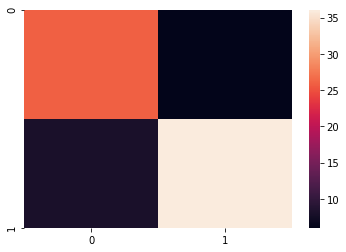

In [51]:
# # Plot a confusion matrix with Seaborn
import seaborn as sns
sns.heatmap(conf_mat)

In [52]:
# # # Install a package within the current Jupyter Kernel
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

## NOTE: Matplotlib is currently broken, hence why this plot seems weird, will wait for an update or see what's wrong in the video

See this StackOverflow for reference: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

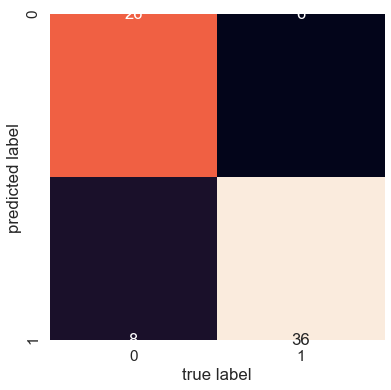

In [53]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
ax = sns.heatmap(conf_mat,
            square=False,
            annot=True,
            fmt='g',
            cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

You can also plot a confusion matrix using the function in scikit-learn's documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization


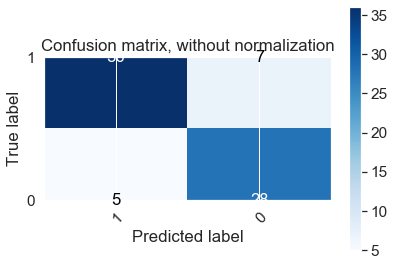

In [36]:
# Plotting a confusion matrix with sklearn
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Call the function
plot_confusion_matrix(y_test, 
                      y_preds, 
                      classes=heart_disease["target"].unique());

We want to maximise the above error, but minimise the two values below:

In [129]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

6036.7105

In [130]:
# Mean absolute error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
np.sqrt(mse)

8065.222273114982

In [131]:
car_sales["Price"].describe()

count     1000.000000
mean     16045.665000
std       8630.794219
min       2796.000000
25%       9481.500000
50%      14264.000000
75%      20738.750000
max      52458.000000
Name: Price, dtype: float64

## 6. Use the model to make a prediction

## 7. Explore more options (experimentation)
* Turn hypyerparameters manually, with `GridSearchCV` and `RandomSearchCV`
    * You should use cross-validation here
    * Train on the training set, tune on validation set, test on test set
    * You might've seen throughout a warning appear when we call the RandomForest models, if not, you're using a later 
* Ways to improve your model
    * Data perspective
        * Feature importance
    * Model perspective

TODO - Run this code... warning appears, "number of estimators is changing", number of estimators is something we can alter.

In [ ]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
model = RandomForestClassifier()

# Call the fit function on the model and pass it training data
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

## 8. Saving and exporting a model
* Use `pickle` to save, export and reload a model

## 9. Revisit the pipeline one more time, knowing what we know now
* Go through an end to end example, filling values, encoding data (one hot), imputing data and putting it all in pipelines with `Pipeline()`.
* This should finsih with an end-to-end workflow in one cell which can be described in a diagram/flowchart.

In [ ]:
# Create an sklearn pipeline which imports data, fixes it and models it